In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

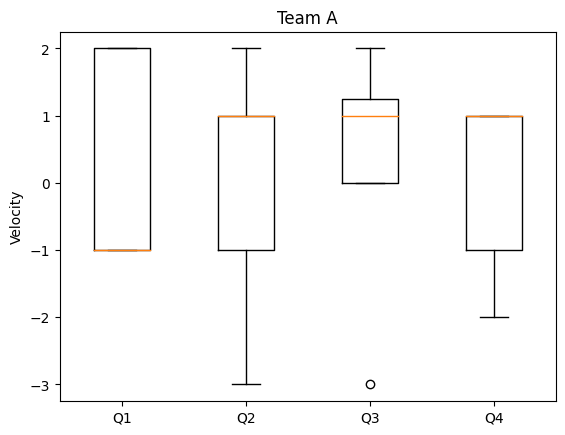

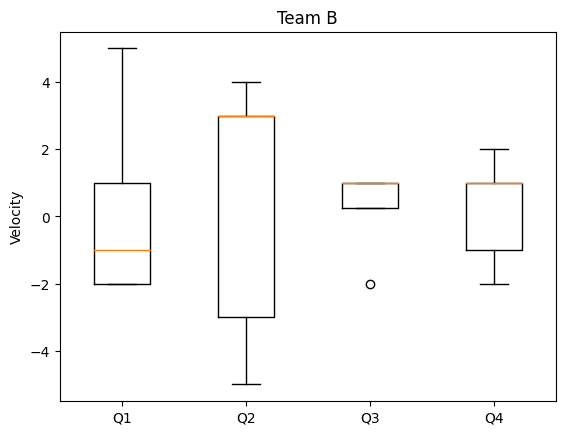

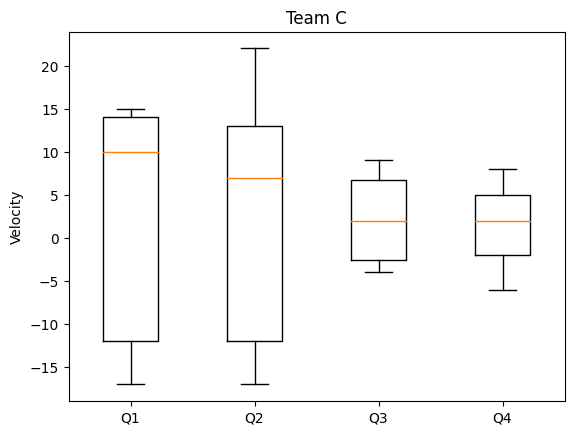

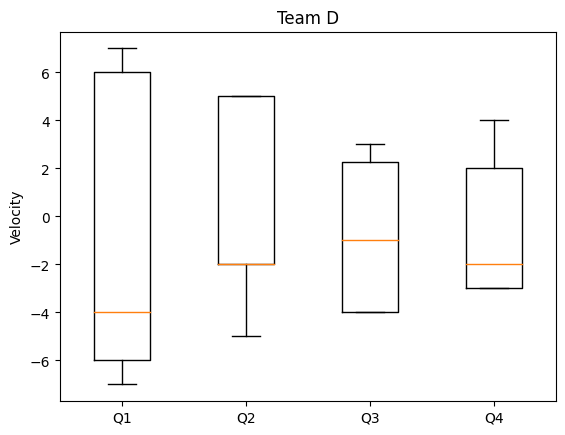

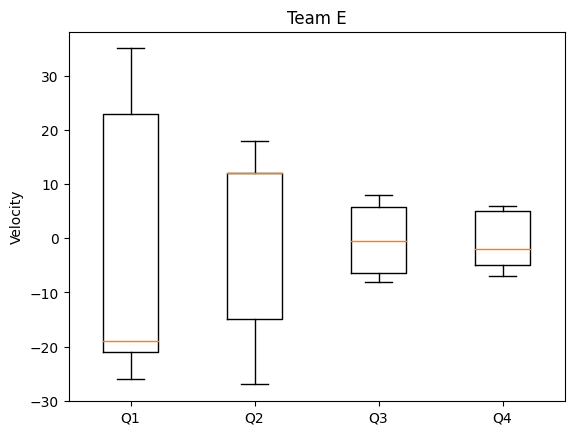

In [ ]:
data_files = ['Q1', 'Q2', 'Q3', 'Q4']
teams = ['A', 'B', 'C', 'D', 'E']

dfs = []

for data_file in data_files:
    df = pd.read_csv(f'{data_file}.csv')
    df['y'] = np.zeros(len(df.index))
    dfs.append(df)

means = np.zeros((len(data_files), len(teams)))
stds = np.zeros_like(means)
plot_data = []

for j, team in enumerate(teams):
    plt_data = []
    for i, df in enumerate(dfs):
        fdf = df[df['Team'] == team]
        means[i, j] = np.mean(fdf['Velocity'])
        stds[i, j] = np.std(fdf['Velocity'])
        plt_data.append(fdf['Velocity'].diff().dropna())
        df.loc[df['Team'] == team, 'y'] = stds[i, j]
    plt.boxplot(plt_data, labels = data_files)
    plt.title(f'Team {team}')
    plt.ylabel('Velocity')
    plt.show()

In [ ]:
print(means)
print(stds)

[[25.         19.83333333 25.83333333 24.5        44.33333333]
 [25.5        22.         29.66666667 25.66666667 52.        ]
 [27.4        20.2        31.6        24.6        39.4       ]
 [29.66666667 21.16666667 33.         26.         43.66666667]]
[[ 0.81649658  1.57233019  6.69369521  3.09569594 12.97005097]
 [ 0.95742711  2.081666    7.76029782  2.2852182   9.64365076]
 [ 1.0198039   0.74833148  4.12795349  1.8547237   4.54312668]
 [ 0.94280904  1.06718737  3.26598632  1.41421356  2.56038192]]


In [ ]:
for df in dfs:
    print(df.to_latex())

\begin{tabular}{llrrrrrrrrrrrrr}
\toprule
{} & Team &  Sprint &  Size &  Team change (to previous Q) &  Scrum &  Kanban &  Velocity based planning &  MD based planning &  Planning with buffers &  CR &  Pair programming &  Tests &  Velocity &          y \\
\midrule
0  &    A &       1 &     8 &                            0 &      1 &       0 &                        1 &                  0 &                      1 &   1 &                 1 &      1 &        25 &   0.816497 \\
1  &    A &       2 &     8 &                            0 &      1 &       0 &                        1 &                  0 &                      1 &   1 &                 1 &      1 &        24 &   0.816497 \\
2  &    A &       3 &     8 &                            0 &      1 &       0 &                        1 &                  0 &                      1 &   1 &                 1 &      1 &        26 &   0.816497 \\
3  &    A &       4 &     8 &                            0 &      1 &       0 &              

<ipython-input-24-9e6072a712ce>:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


In [ ]:
%pip install scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

In [ ]:
combined_data = pd.concat(dfs)
combined_data['diff'] =  np.zeros(len(combined_data.index))
for team in teams:
    combined_data.loc[combined_data["Team"] == team, 'diff'] = combined_data[combined_data["Team"] == team]['Velocity'].diff()
# combined_data = combined_data[combined_data["Sprint"] == 1]
combined_data = combined_data.dropna()
print(combined_data)
X = combined_data.iloc[:, 2:-3].to_numpy()
y = combined_data['diff'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

   Team  Sprint  Size  Team change (to previous Q)  Scrum  Kanban  \
1     A       2     8                            0      1       0   
2     A       3     8                            0      1       0   
3     A       4     8                            0      1       0   
4     A       5     8                            0      1       0   
5     A       6     8                            0      1       0   
..  ...     ...   ...                          ...    ...     ...   
25    E       2    15                            1      1       0   
26    E       3    15                            1      1       0   
27    E       4    15                            1      1       0   
28    E       5    15                            1      1       0   
29    E       6    15                            1      1       0   

    Velocity based planning  MD based planning  Planning with buffers  CR  \
1                         1                  0                      1   1   
2                

In [ ]:
ensemble = RandomForestRegressor(n_estimators = 10)
tree = DecisionTreeRegressor()

ensemble.fit(X_train, y_train)
tree.fit(X_train, y_train)

print(importances_f := np.round(ensemble.feature_importances_, decimals=3))
print(importances_t := np.round(tree.feature_importances_, decimals=3))

[0.422 0.189 0.063 0.042 0.019 0.082 0.143 0.01  0.008 0.021]
[0.078 0.613 0.005 0.    0.006 0.055 0.    0.241 0.    0.002]


In [ ]:
features = combined_data.columns[2:-2]
ranking_forest = np.argsort(importances_f)[::-1]
print(features[ranking_forest].to_list())
ranking_tree = np.argsort(importances_t)[::-1]
print(features[ranking_tree].to_list())

['Size', 'Team change (to previous Q)', 'Planning with buffers', 'MD based planning', 'Scrum', 'Kanban', 'Tests', 'Velocity based planning', 'CR', 'Pair programming']
['Team change (to previous Q)', 'CR', 'Size', 'MD based planning', 'Velocity based planning', 'Scrum', 'Tests', 'Pair programming', 'Planning with buffers', 'Kanban']


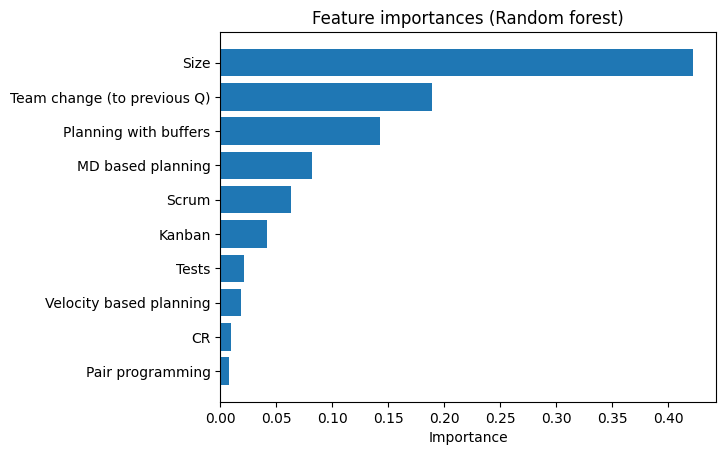

In [ ]:
fig, ax = plt.subplots()

# Example data
people = features[ranking_forest].to_list()
y_pos = np.arange(len(people))
performance = importances_f[ranking_forest]

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Importance')
ax.set_title('Feature importances (Random forest)')

plt.show()

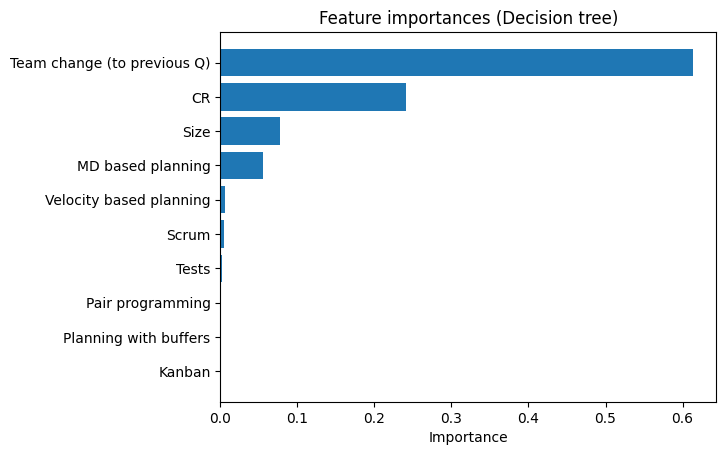

In [ ]:
fig, ax = plt.subplots()

# Example data
people = features[ranking_tree].to_list()
y_pos = np.arange(len(people))
performance = importances_t[ranking_tree]

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Importance')
ax.set_title('Feature importances (Decision tree)')

plt.show()

[Text(0.4230769230769231, 0.9375, 'Team change (to previous Q) <= -1.0\nsquared_error = 78.858\nsamples = 99\nvalue = -0.01'),
 Text(0.2692307692307692, 0.8125, 'MD based planning <= 0.5\nsquared_error = 38.776\nsamples = 7\nvalue = -3.286'),
 Text(0.19230769230769232, 0.6875, 'squared_error = 29.188\nsamples = 4\nvalue = -2.25'),
 Text(0.34615384615384615, 0.6875, 'squared_error = 48.222\nsamples = 3\nvalue = -4.667'),
 Text(0.5769230769230769, 0.8125, 'CR <= 0.5\nsquared_error = 81.03\nsamples = 92\nvalue = 0.239'),
 Text(0.5, 0.6875, 'squared_error = 130.667\nsamples = 3\nvalue = 4.0'),
 Text(0.6538461538461539, 0.6875, 'Team change (to previous Q) <= 2.0\nsquared_error = 78.864\nsamples = 89\nvalue = 0.112'),
 Text(0.5769230769230769, 0.5625, 'Team change (to previous Q) <= 0.5\nsquared_error = 63.975\nsamples = 83\nvalue = -0.024'),
 Text(0.38461538461538464, 0.4375, 'Size <= 9.0\nsquared_error = 64.236\nsamples = 60\nvalue = -0.217'),
 Text(0.23076923076923078, 0.3125, 'Tests <= 

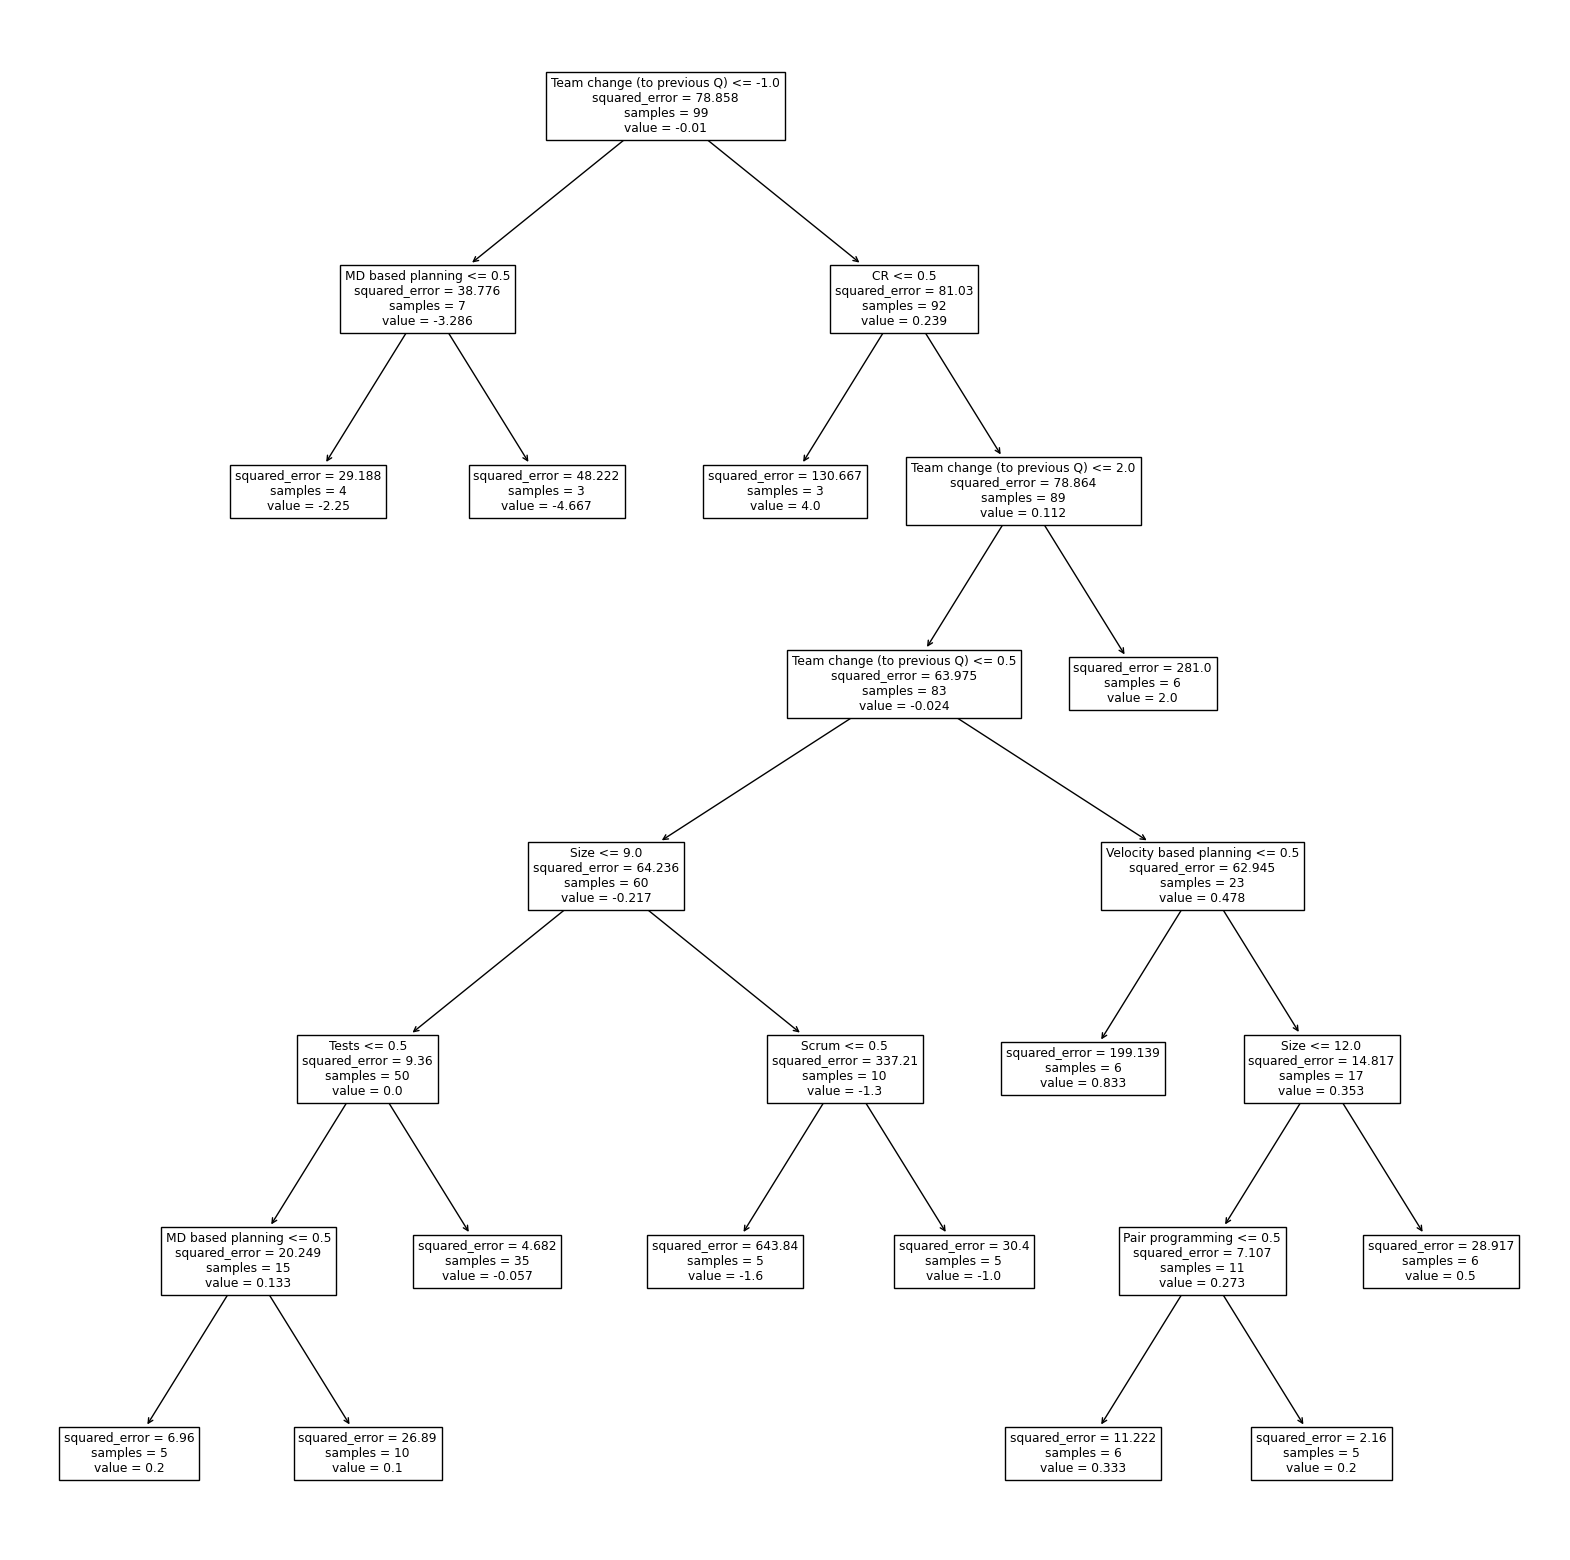

In [ ]:
plt.figure(figsize=(20,20))
plot_tree(tree, feature_names=features.to_list())

In [ ]:
from sklearn.metrics import mean_absolute_error

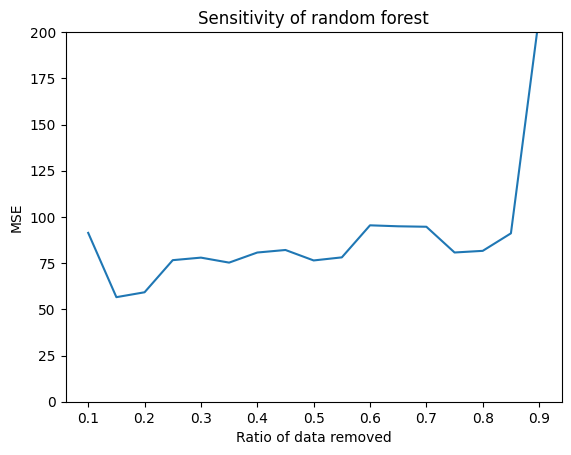

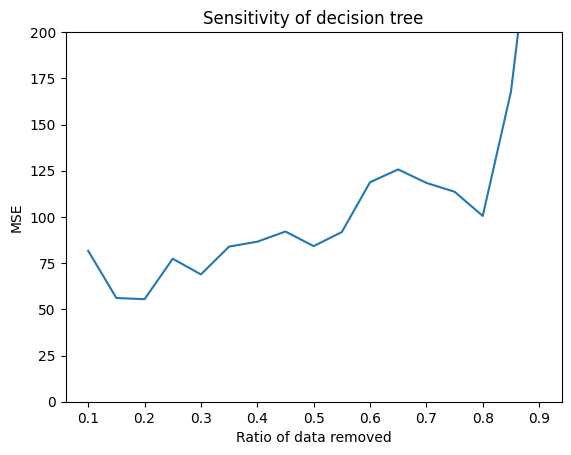

In [ ]:
errors_fs = []
errors_ts = []
split_range = np.arange(0.1, 0.95, 0.05)
for split in split_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state = 42)
    ensemble.fit(X_train, y_train)
    tree.fit(X_train, y_train)
    errors_fs.append(np.square(ensemble.predict(X_test) - y_test).mean(axis=0))
    errors_ts.append(np.square(tree.predict(X_test) - y_test).mean(axis=0))

sensitivity_f = errors_fs
sensitivity_t = errors_ts

plt.plot(split_range, sensitivity_f)
plt.title("Sensitivity of random forest")
plt.ylabel("MSE")
plt.xlabel("Ratio of data removed")
plt.ylim(0, 200)
plt.show()

plt.plot(split_range, sensitivity_t)
plt.title("Sensitivity of decision tree")
plt.ylabel("MSE")
plt.xlabel("Ratio of data removed")
plt.ylim(0, 200)
plt.show()

In [ ]:
combined_data[combined_data["Team"] == 'A']['diff'].to_list()

[-1.0,
 2.0,
 -1.0,
 -1.0,
 2.0,
 0.0,
 -1.0,
 2.0,
 -3.0,
 1.0,
 1.0,
 1.0,
 2.0,
 -3.0,
 1.0,
 1.0,
 2.0,
 -2.0,
 1.0,
 1.0,
 1.0,
 -1.0]

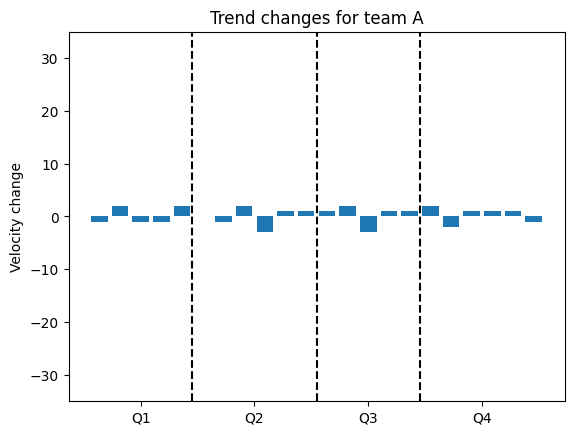

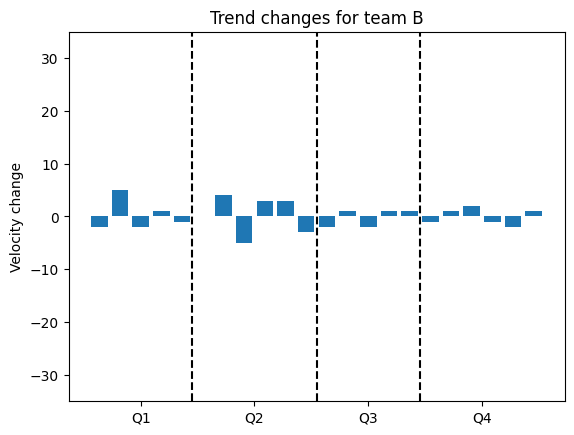

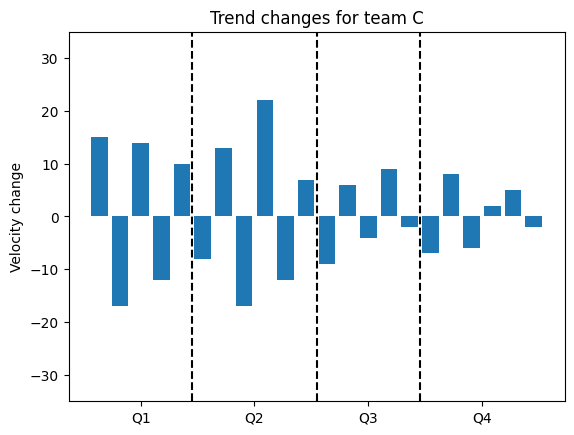

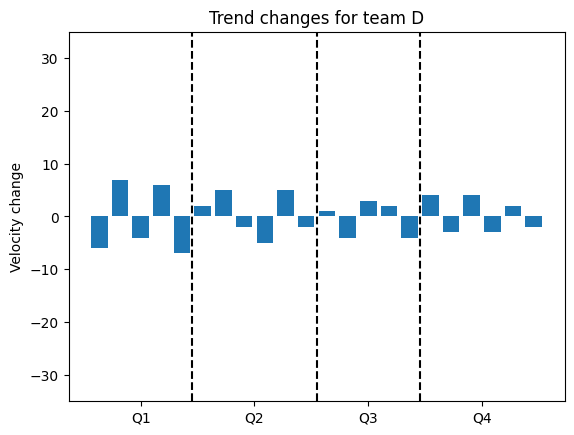

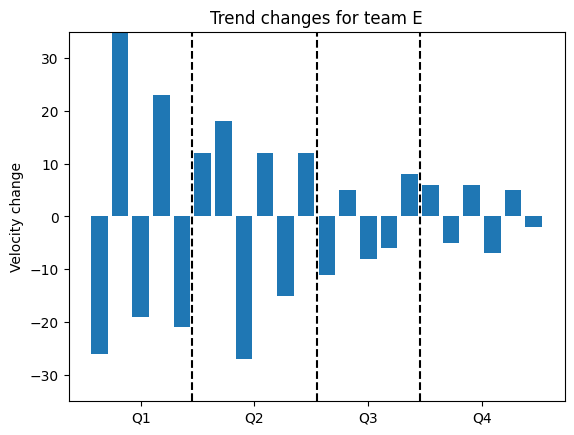

In [ ]:
for team in teams:
    y_data = combined_data[combined_data["Team"] == team]['diff'].to_list()
    plt.bar(np.arange(0, len(y_data), 1), y_data)
    plt.title(f"Trend changes for team {team}")
    plt.ylabel('Velocity change')
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,-35, 35))
    plt.axvline(x = 4.5, color = 'black', linestyle = '--')
    plt.axvline(x = 10.5, color = 'black', linestyle = '--')
    plt.axvline(x = 15.5, color = 'black', linestyle = '--')
    plt.xticks(ticks=[2, 7.5, 13, 18.5], labels=data_files)
    plt.show()